## Recommendations for Microsoft's New Movie Studio

####  In this notebook we are going to analyze the relationship between the movie success and movie time of release,movie runtime, movie genre, directors, and actors/actresses. Success will be based on ROI and Profit margin.

#### First objective is to clean up the movie budget dataframe, then merge all the relevant data sets.

In [1]:

#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure
import sqlite3 





In [2]:
!ls ..



Andrew_Boucher_Notebook.ipynb
LICENSE
README.md
dsc-phase1-project-template.ipynb
notebook_development
zippedData


In [3]:
!ls ../zippedData

bom.movie_gross.csv.gz
im.db
im.db.zip
im.dbo
imdb.name.basics.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
j copy.ipynb
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


In [4]:
conn = sqlite3.connect('../zippedData/im.db/im.db')

In [5]:
df_sql = pd.read_sql("""SELECT * FROM sqlite_master """, conn)
df_sql

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [6]:
run_time = pd.read_sql("""
select *
from movie_basics
""", conn)

In [7]:
run_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
run_time.dropna(subset=['genres'], inplace=True )

In [9]:
run_time.isna().sum()

movie_id               0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

In [10]:
run_time.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [11]:
run_time['genres'].value_counts()[0:10]

Documentary              32185
Drama                    21486
Comedy                    9177
Horror                    4372
Comedy,Drama              3519
Thriller                  3046
Action                    2219
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64

In [12]:
genre_mean = run_time.groupby(by=['genres']).mean()


In [13]:
genre_mean.head(5)

,start_year,runtime_minutes
genres,,
Action,2015.032898,102.427580
"Action,Adult,Comedy",2014.000000,71.000000
"Action,Adventure",2015.096491,99.592593
"Action,Adventure,Animation",2015.096447,91.502890
"Action,Adventure,Biography",2015.176471,83.068966


In [14]:
keys = list(genre_mean.index)

In [15]:
values = list(genre_mean['runtime_minutes'].values)

In [16]:
new_dict = dict(zip(keys,values))
new_dict

{'Action': 102.4275802254987,
 'Action,Adult,Comedy': 71.0,
 'Action,Adventure': 99.5925925925926,
 'Action,Adventure,Animation': 91.5028901734104,
 'Action,Adventure,Biography': 83.06896551724138,
 'Action,Adventure,Comedy': 94.83388704318936,
 'Action,Adventure,Crime': 97.13636363636364,
 'Action,Adventure,Documentary': 61.851190476190474,
 'Action,Adventure,Drama': 104.27853881278538,
 'Action,Adventure,Family': 98.63333333333334,
 'Action,Adventure,Fantasy': 104.35398230088495,
 'Action,Adventure,History': 98.2,
 'Action,Adventure,Horror': 88.24193548387096,
 'Action,Adventure,Music': 89.66666666666667,
 'Action,Adventure,Musical': 97.0,
 'Action,Adventure,Mystery': 100.63636363636364,
 'Action,Adventure,Romance': 112.66666666666667,
 'Action,Adventure,Sci-Fi': 105.91911764705883,
 'Action,Adventure,Sport': 55.666666666666664,
 'Action,Adventure,Thriller': 104.94827586206897,
 'Action,Adventure,War': 80.71428571428571,
 'Action,Adventure,Western': 96.0,
 'Action,Animation': 93.2857

In [17]:
# impute .map run_time_min column to fill in nan with median of a specific genre  

run_time['run_time_mean'] = run_time['runtime_minutes'].fillna(run_time['genres'].map(new_dict))
run_time.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,run_time_mean
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",175.000000
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",114.000000
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,122.000000
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",96.999684
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",80.000000


In [18]:
run_time.dropna(subset=['run_time_mean'], inplace=True )

In [19]:
run_time.isna().sum()

movie_id               0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28446
genres                 0
run_time_mean          0
dtype: int64

In [20]:
run_time.shape

(140679, 7)

In [21]:
run_time.isna().sum()

movie_id               0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28446
genres                 0
run_time_mean          0
dtype: int64

In [22]:

funds = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz') 



In [23]:
funds.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
#copy df to work on, do not overwrite orignal 
numbers = funds.copy()



#funtion for cleaning
def clean_a_money_column(df, series_title):
    df[series_title] = df[series_title].str.replace('$','')
    df[series_title] = df[series_title].str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    return df



#remove $ string
numbers = clean_a_money_column(numbers,'worldwide_gross')
numbers = clean_a_money_column(numbers,'domestic_gross')
numbers = clean_a_money_column(numbers,'production_budget')



# new column foreign_gross, Profit Margin, ROI
numbers['net_income'] = numbers['worldwide_gross'] - numbers['production_budget']
numbers['foreign_gross'] = numbers['worldwide_gross'] - numbers['domestic_gross']
numbers['Profit Margin'] = (numbers['net_income']*100)/numbers['worldwide_gross']
numbers.loc[numbers['Profit Margin'] == float('-inf'), 'Profit Margin'] = 0
numbers['ROI'] = (numbers['net_income']) / numbers['production_budget'] * 100



# new columns month and year 
numbers['Year'] = pd.to_numeric(numbers['release_date'].map(lambda x: x[-4:]))
numbers['Month'] = numbers['release_date'].map(lambda x: x[:3])



#check for dupes
movie_dupes = pd.Series(numbers['movie'].value_counts())
title_dupes = [movie_dupes.index[index] for index in list(range(len(movie_dupes))) if movie_dupes.values[index] > 1]
numbers[numbers['movie'].isin(title_dupes)]

numbers.head(3)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_income,foreign_gross,Profit Margin,ROI,Year,Month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2015837654,84.692106,553.257713,2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,804600000,60.733080,154.667286,2011,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,107000000,-133.703598,-57.210757,2019,Jun


In [25]:
movies_2000 = numbers.loc[numbers['Year'] >= 2000]  
movies_2000

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_income,foreign_gross,Profit Margin,ROI,Year,Month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2015837654,84.692106,553.257713,2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,804600000,60.733080,154.667286,2011,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,107000000,-133.703598,-57.210757,2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,944008095,76.436443,324.384139,2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,696540365,75.925058,315.369636,2017,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100,0,-677.777778,-87.142857,2004,Dec
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000,0,0.000000,-100.000000,2018,Dec
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662,0,-273.692078,-73.240000,2005,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400,0,0.000000,-100.000000,2015,Sep


In [26]:
movie_dupes = pd.Series(movies_2000['movie'].value_counts())
movie_dupes

Home                       3
Halloween                  2
Hellboy                    2
Snitch                     2
Brothers                   2
                          ..
Dance Flick                1
Hello, My Name is Doris    1
Minions                    1
Friends with Benefits      1
Due Date                   1
Name: movie, Length: 4364, dtype: int64

In [27]:
#king_kong = numbers.loc[movies_2000['movie'] == 'King Kong']  
#king_kong


In [28]:
title_dupes = [movie_dupes.index[index] for index in list(range(len(movie_dupes))) if movie_dupes.values[index] > 1]
title_dupes[0:5]

['Home', 'Halloween', 'Hellboy', 'Snitch', 'Brothers']

In [29]:
movies_2000[movies_2000['movie'].isin(title_dupes)]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_income,foreign_gross,Profit Margin,ROI,Year,Month
38,39,"May 14, 2010",Robin Hood,210000000,105487148,322459006,112459006,216971858,34.875443,53.551908,2010,May
243,44,"Mar 27, 2015",Home,130000000,177397510,385997896,255997896,208600386,66.321060,196.921458,2015,Mar
297,98,"Aug 7, 2015",Fantastic Four,120000000,56117548,167849187,47849187,111731639,28.507250,39.874322,2015,Aug
302,3,"Oct 5, 2018",Venom,116000000,213511408,853628605,737628605,640117197,86.410952,635.886728,2018,Oct
408,9,"Nov 21, 2018",Robin Hood,99000000,30824628,84747441,-14252559,53922813,-16.817687,-14.396524,2018,Nov
484,85,"Jul 8, 2005",Fantastic Four,87500000,154696080,333132750,245632750,178436670,73.734195,280.723143,2005,Jul
883,84,"Apr 2, 2004",Hellboy,60000000,59623958,99823958,39823958,40200000,39.894189,66.373263,2004,Apr
1055,56,"Jun 16, 2000",Shaft,53012938,70327868,107190108,54177170,36862240,50.543069,102.196128,2000,Jun
1176,77,"Apr 12, 2019",Hellboy,50000000,21903748,40725492,-9274508,18821744,-22.773225,-18.549016,2019,Apr
1420,21,"Feb 18, 2011",Unknown,40000000,63686397,136123083,96123083,72436686,70.614830,240.307708,2011,Feb


# Genre Data Exploration 

In [30]:
run_time['genres'].map(lambda x: x.split(','))

0           [Action, Crime, Drama]
1               [Biography, Drama]
2                          [Drama]
3                  [Comedy, Drama]
4         [Comedy, Drama, Fantasy]
                    ...           
146137           [Drama, Thriller]
146139                     [Drama]
146140               [Documentary]
146141                    [Comedy]
146143               [Documentary]
Name: genres, Length: 140679, dtype: object

In [31]:
run_time['genres_list'] = run_time['genres'].str.split(',')

In [32]:
run_time.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,run_time_mean,genres_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",175.000000,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",114.000000,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,122.000000,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",96.999684,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",80.000000,"[Comedy, Drama, Fantasy]"


In [33]:
single_genres = run_time.explode('genres_list')
single_genres

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,run_time_mean,genres_list
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",175.000000,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",175.000000,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",175.000000,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",114.000000,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",114.000000,Drama
...,...,...,...,...,...,...,...,...
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller",90.000000,Thriller
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,123.000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,74.659574,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,93.284734,Comedy


In [34]:
single_genres['genres_list'].value_counts()[0:20]

Documentary    51639
Drama          49875
Comedy         25303
Thriller       11876
Horror         10797
Action         10329
Romance         9363
Biography       8716
Crime           6749
Adventure       6461
Family          6223
History         6217
Mystery         4655
Music           4309
Fantasy         3506
Sci-Fi          3363
Animation       2790
Sport           2227
News            1549
Musical         1423
Name: genres_list, dtype: int64

In [35]:
single_genres['genres_list'].unique()

array(['Action', 'Crime', 'Drama', 'Biography', 'Comedy', 'Fantasy',
       'Horror', 'Thriller', 'Adventure', 'Animation', 'Documentary',
       'History', 'Mystery', 'Sci-Fi', 'Romance', 'Family', 'War',
       'Music', 'Sport', 'Western', 'Musical', 'Adult', 'News',
       'Talk-Show', 'Reality-TV', 'Game-Show', 'Short'], dtype=object)

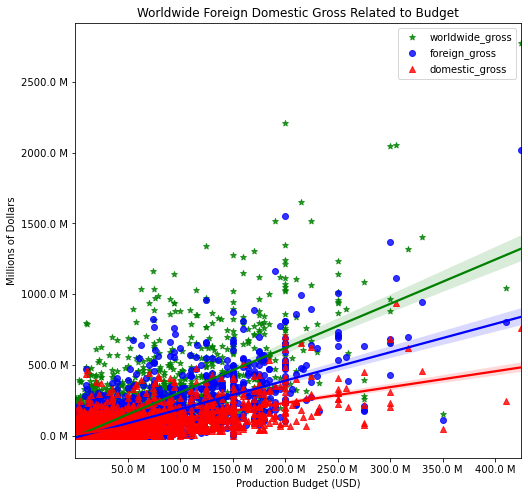

In [36]:
# 'Worldwide & Domestic Gross Related to Production Budget',

# set up figure convert to millions
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

fig, ax = plt.subplots(figsize=(8,8), sharey=True)


# green dots/line will be ww gross as a function of production_budget
ax1 = sns.regplot(data=numbers, x='production_budget',
                 y='worldwide_gross', color='green',marker='*', label='worldwide_gross')

# blue dots/line will be foreign_gross gross as a function of production_budget
ax2 = sns.regplot(data=numbers, x='production_budget',
                 y='foreign_gross', color='blue',marker='o', label='foreign_gross')

# red dots/line will be domestic_gross as a function of production_budget
ax2 = sns.regplot(data=numbers, x='production_budget',
                 y='domestic_gross', color='red',marker='^', label='domestic_gross')



# include a legend
ax.legend()

# set title and axis labels
ax.set(title='Worldwide Foreign Domestic Gross Related to Budget',
      xlabel='Production Budget (USD)',
      ylabel = 'Millions of Dollars')

ax.xaxis.set_major_formatter(million_formatter)
ax.yaxis.set_major_formatter(million_formatter)

In [37]:
numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_income,foreign_gross,Profit Margin,ROI,Year,Month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2015837654,84.692106,553.257713,2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,804600000,60.733080,154.667286,2011,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,107000000,-133.703598,-57.210757,2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,944008095,76.436443,324.384139,2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,696540365,75.925058,315.369636,2017,Dec


In [38]:
top_5_wg = numbers['worldwide_gross'].nlargest(n=10)
top_5_wg

0      2776345279
42     2208208395
5      2053311220
6      2048134200
33     1648854864
66     1518722794
26     1517935897
3      1403013963
41     1348258224
260    1341693157
Name: worldwide_gross, dtype: int64

In [39]:
top_5_gross = numbers.sort_values(by= 'worldwide_gross', ascending=False)[0:5]
top_5_gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_income,foreign_gross,Profit Margin,ROI,Year,Month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2015837654,84.692106,553.257713,2009,Dec
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1548844451,90.942884,1004.104198,1997,Dec
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,1116648995,85.097242,571.016739,2015,Dec
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,1369318718,85.352522,582.711400,2018,Apr
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,996584239,86.960647,666.909239,2015,Jun


In [40]:
top_5_gross['foreign_gross'].mean

<bound method Series.mean of 0     2015837654
42    1548844451
5     1116648995
6     1369318718
33     996584239
Name: foreign_gross, dtype: int64>

In [41]:
X_axis = np.arange(len(X))
X_axis

NameError: name 'X' is not defined

In [ ]:
#X = ['Avatar', 'Titanic', 'Star', 'Avengers', 'J_world']
x_ticks_labels = ['horror', 'family', 'Action,Adventure,Sci-Fi', 'Action,Adventure,Sci-F', 'Action,Adventure,Sci-Fi']

x = x_ticks_labels



X_axis = np.arange(len(x))

plt.figure(figsize=(10,12))




plt.bar(X_axis - .2, top_5_gross['domestic_gross'], color ='purple',
        width = 0.4, label = 'domestic_gross' )
plt.bar(X_axis + .2, top_5_gross['foreign_gross'], color ='green',
        width = 0.4, label = 'foreign_gross' )
plt.xlabel("Genre")
plt.ylabel("Gross in Millions")
plt.title("Top 5 Foreign Vs Domestic Gross")
plt.xticks(X_axis, x_ticks_labels)
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.show();






In [ ]:
ax = top_5_gross.plot(x="production_budget", y="", kind="bar")
# plotting age on the same axis
top_5_gross.plot(x="production_budget", y="worldwide_gross", kind="bar", ax=ax, color="maroon")

In [ ]:
plt.figure(figsize=(12,12))
x = X = ['Avatar', 'Titanic', 'Star', 'Avengers', 'J_world']




plt.bar(top_5_gross = production_budget,label="production_budget")
plt.bar(top_5_gross = worldwide_gross,bottom=production_budget, color = 'r', label="worldwide_gross")


    
plt.xlabel("MOVIES")
plt.ylabel("Y in Millions_of_Dollars")
plt.title("Top 5 Movie Worldwide Gross and Budget")
plt.legend(loc="upper left")

In [ ]:

top_genres = list(single_genres['genres_list'].value_counts().index[0:5])
top_g_counts = list(single_genres['genres_list'].value_counts().values[:5])




print("genres:", top_genres)
print("Counts:", top_g_counts)

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

ax.set_title("Top 5 Most Common Genre")
ax.bar(top_genres, top_g_counts, color='purple')

In [ ]:

top_genres_10 = list(single_genres['genres_list'].value_counts().index[0:23])
top_g_counts_10 = list(single_genres['genres_list'].value_counts().values[:23])




print("genres:", top_genres_10)
print("Counts:", top_g_counts_10)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.set_title("Top 10 Most Common Genre")
ax.bar(top_genres_10, top_g_counts_10, color='purple')

In [ ]:
def genegraph(gene):
    jon = huey.loc[huey['genres_list'].str.contains(gene)]
    fig, ax = plt.subplots(figsize=(10,10))
    x = jon['runtime_minutes']
    y = jon['worldwide_gross']
    ax.scatter(x,y)
    ax.axvline(x.median(), label='Median', linestyle='--', color= 'Red')
genegraph('Comedy')


In [ ]:
# 'Worldwide & Domestic Gross Related to Production Budget',

# set up figure convert to millions
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

fig, ax = plt.subplots(figsize=(8,8), sharey=True)


# green dots/line will be ww gross as a function of production_budget
ax1 = sns.regplot(data=numbers, x='production_budget',
                 y='worldwide_gross', color='green',marker='*', label='worldwide_gross')

# blue dots/line will be foreign_gross gross as a function of production_budget
ax2 = sns.regplot(data=numbers, x='production_budget',
                 y='foreign_gross', color='blue',marker='o', label='foreign_gross')

# red dots/line will be domestic_gross as a function of production_budget
ax2 = sns.regplot(data=numbers, x='production_budget',
                 y='domestic_gross', color='red',marker='^', label='domestic_gross')



# include a legend
ax.legend()

# set title and axis labels
ax.set(title='Worldwide Foreign Domestic Gross Related to Budget',
      xlabel='Production Budget (USD)',
      ylabel = 'Millions of Dollars')

ax.xaxis.set_major_formatter(million_formatter)
ax.yaxis.set_major_formatter(million_formatter)

In [ ]:
# 'Worldwide & Domestic Gross Related to Production Budget',

# set up figure convert to millions
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

fig, ax = plt.subplots(figsize=(8,8), sharey=True)


# green dots/line will be ww gross as a function of production_budget
ax1 = sns.regplot(data=numbers, x='production_budget',
                 y='worldwide_gross', color='green',marker='*', label='worldwide_gross')

# blue dots/line will be foreign_gross gross as a function of production_budget
ax2 = sns.regplot(data=numbers, x='production_budget',
                 y='foreign_gross', color='blue',marker='o', label='foreign_gross')





# include a legend
ax.legend()

# set title and axis labels
ax.set(title='Worldwide Foreign Domestic Gross Related to Budget',
      xlabel='Production Budget (USD)',
      ylabel = 'Millions of Dollars')

ax.xaxis.set_major_formatter(million_formatter)
ax.yaxis.set_major_formatter(million_formatter)

In [ ]:
# 'Worldwide & Domestic Gross Related to Production Budget',

# set up figure convert to millions
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

fig, ax = plt.subplots(figsize=(8,8), sharey=True)



# blue dots/line will be foreign_gross gross as a function of production_budget
ax2 = sns.regplot(data=numbers, x='production_budget',
                 y='foreign_gross', color='blue',marker='o', label='foreign_gross')

# red dots/line will be domestic_gross as a function of production_budget
ax2 = sns.regplot(data=numbers, x='production_budget',
                 y='domestic_gross', color='red',marker='^', label='domestic_gross')



# include a legend
ax.legend()

# set title and axis labels
ax.set(title='Worldwide Foreign Domestic Gross Related to Budget',
      xlabel='Production Budget (USD)',
      ylabel = 'Millions of Dollars')

ax.xaxis.set_major_formatter(million_formatter)
ax.yaxis.set_major_formatter(million_formatter)